In [1]:
#Level 1:Task 1-Top Cuisines

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\moham\Downloads\Dataset .csv")  

In [3]:
print(data['Cuisines'].head(3))

0          French, Japanese, Desserts
1                            Japanese
2    Seafood, Asian, Filipino, Indian
Name: Cuisines, dtype: object


In [4]:
#Determine the top three most common cuisines in the data
cuisines = data['Cuisines'].str.split(', ').explode()
top_cuisines = cuisines.value_counts().head(3)
print(top_cuisines)

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [5]:
#calculate the percentage of restaurants that serve each of the top cuisines.
total = len(data)
for cuisine, count in top_cuisines.items():
    percent = (count / total) * 100
    print(f"{cuisine}: {percent:.2f}% of restaurants")

North Indian: 41.46% of restaurants
Chinese: 28.64% of restaurants
Fast Food: 20.79% of restaurants


In [6]:
#Level 1:Task 2-City Analysis

In [7]:
top_city = data['City'].value_counts().idxmax()
print("City with most restaurants:", top_city)

City with most restaurants: New Delhi


In [8]:
#Calculate the average rating for restaurants in each city.
data = data.dropna(subset=['City', 'Aggregate rating'])
avg_ratings = data.groupby('City')['Aggregate rating'].mean()

In [9]:
#Determine the city with the highest average rating.
best_city = avg_ratings.idxmax()
print("City with highest average rating:", best_city)

City with highest average rating: Inner City


In [10]:
#Level 1:Task 3-Price Range Distribution

In [ ]:
data = data.dropna(subset=['Price range'])

In [ ]:
data['Price range'] = data['Price range'].astype(int)
price_counts = data['Price range'].value_counts().sort_index()

In [ ]:
price_percent = (price_counts / len(data)) * 100
print("Percentage of restaurants in each price range:")
print(price_percent.round(2))


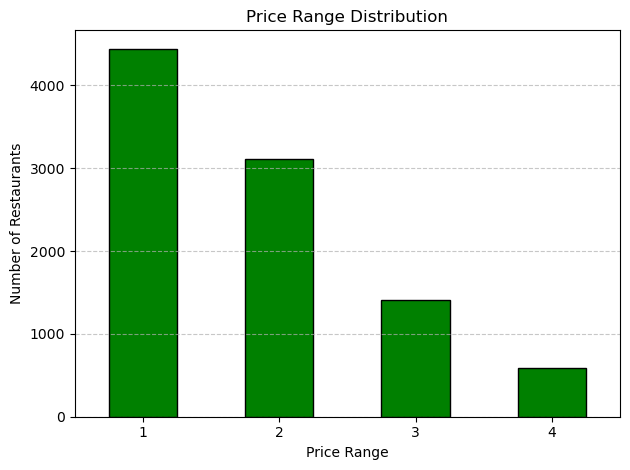

In [15]:
#Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
price_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
#Calculate the percentage of restaurants in each price range category.
price_percent = (price_counts / len(data)) * 100
print("Percentage of restaurants in each price range:")
print(price_percent.round(2))

Percentage of restaurants in each price range:
Price range
1    46.53
2    32.59
3    14.74
4     6.14
Name: count, dtype: float64


In [17]:
data = data.dropna(subset=['Has Online delivery', 'Aggregate rating'])
data['Aggregate rating'] = pd.to_numeric(data['Aggregate rating'], errors='coerce')


In [18]:
#Determine the percentage of restaurants that offer online delivery.
online_delivery_counts = data['Has Online delivery'].value_counts()
total = online_delivery_counts.sum()
print(total)

9551


In [19]:
online_percent = (online_delivery_counts.get('Yes', 0) / total) * 100
print(f"Percentage of restaurants that offer online delivery: {online_percent:.2f}%")

Percentage of restaurants that offer online delivery: 25.66%


In [20]:
#Compare the average ratings of restaurants with and without online delivery.
avg_rating_online = data[data['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_offline = data[data['Has Online delivery'] == 'No']['Aggregate rating'].mean()

In [21]:
print(f"Average rating (online delivery): {avg_rating_online:.2f}")
print(f"Average rating (no online delivery): {avg_rating_offline:.2f}")

Average rating (online delivery): 3.25
Average rating (no online delivery): 2.47
